In [1]:
"""
Introduction to statistical and machine learning using scikit-learn (https://scikit-learn.org/stable/)

Instructor: Shaina Lu (slu@cshl.edu)
2019 URP Data Analysis using Python Course
11 July 2019"""

'\nIntroduction to statistical and machine learning using scikit-learn (https://scikit-learn.org/stable/)\n\nInstructor: Shaina Lu (slu@cshl.edu)\n2019 URP Data Analysis using Python Course\n11 July 2019'

# Imports and Globals

In [2]:
#imports
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# An introduction to basic machine learning with sklearn using the Iris dataset

In this first section, we will quickly introduce using scikit-learn for machine learning. This is one of the more popular python packages for statistical and machine learning, it works seamlessly with numpy arrays and pandas dataframes and can be thought of as a machine learning extension to scipy.

(For those interested, a couple years ago Google released their version of a Python machine learning package called TensorFlow. It's very powerful, especially for computationally intensive tasks such as deep learning. TensorFlow uses it's own data structures. We will not be covering TensorFlow in our course; those interested can check out: https://tensorflow.org)

### Load sample data and poke around to understand it

For this tutorial, we'll use a classic dataset called the Iris dataset collected by R.A. Fisher. There will be more details below.

In [3]:
#load data, we're loading a dataset that comes with the library so the functions are specific to it
iris = datasets.load_iris()

In [4]:
#let's see how the iris dataset is stored
type(iris)

sklearn.utils.Bunch

What's an sklearn bunch?? Looking at the documentation for the sklearn iris dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), we see that a bunch is just a python dictionary. Let's try interacting with it as we would a dictionary and seeing the what the keys are.

In [5]:
#get keys from iris dataset
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Great! We see that there are 6 keys. Let's take a look at the description.

In [6]:
#index the iris dictionary to see the description
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

This gives a nice description and background of the classic iris dataset. Now, let's poke around and see what the other things in the iris dictionary are.

In [7]:
#print each of the remaining values in the iris dictionary by indexing the dictionary with the keys
print(iris['data'])
print(iris['target'])
print(iris['target_names'])
print(iris['feature_names'])
print(iris['filename'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Okay, it's clear these values of the iris dataset appear as we expected from the documentation. Let's store the data in a pandas dataframe to more easily manipulate it. 

In [8]:
#create a pandas dataframe to store the data and a pandas series to store the targets or y labels
irisdf = pd.DataFrame(data=iris['data'], index=range(1,151,1), columns=iris['feature_names'])
ylabels = pd.Series(data=iris['target'], index=range(1,151,1), name="iris type")

In [9]:
#let's check that our dataframe looks as we expect
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [10]:
#check the dataframe dimensions
irisdf.shape

(150, 4)

In [11]:
#now let's check the series
ylabels.head()

1    0
2    0
3    0
4    0
5    0
Name: iris type, dtype: int64

In [12]:
#check the series dimensions
ylabels.shape

(150,)

### Get summary statistics for the different features

Everything looks good so far and as we expect. Let's play around with a few summary statistics using pandas. A great resource to look up handy pandas commands is the pandas cheat sheet, available here: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [13]:
#average of all petal lengths
irisdf.loc[:,"petal length (cm)"].mean()

3.7580000000000027

Cool, this output matches with the mean petal length reported in the description. Play around with the other features and other summary statistics. 

In [14]:
#try other features and summary statistics here


Now, what if I only want to get the mean petal length for each of the three iris types? 

In [15]:
#use the ylabels to get the mean for each iris type separately
print(irisdf.loc[ylabels==0,"petal length (cm)"].mean())
print(irisdf.loc[ylabels==1,"petal length (cm)"].mean())
print(irisdf.loc[ylabels==2,"petal length (cm)"].mean())

1.4620000000000002
4.26
5.552


In [ ]:
#try other features and summary statistics here


### Plot two of the features for all the flowers

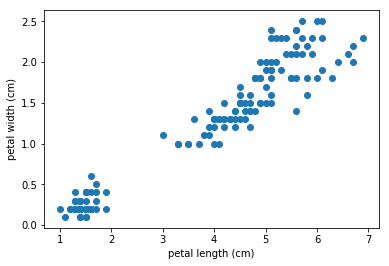

In [16]:
#plot petal length by petal width
plt.scatter(irisdf.loc[:,"petal length (cm)"], irisdf.loc[:,"petal width (cm)"])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

I wonder if that cluster on the lower left represents one type of flower. The iris decription did mention that one group of flowers was linearly separable from the rest. Let's plot each iris type in a different color.

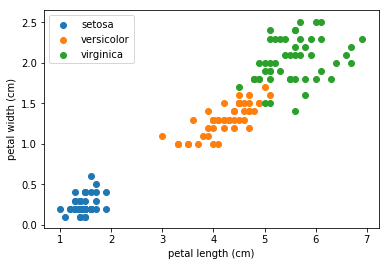

In [17]:
#same as above, but plot each iris type with a different color
plt.scatter(irisdf.loc[ylabels==0,"petal length (cm)"], irisdf.loc[ylabels==0,"petal width (cm)"])
plt.scatter(irisdf.loc[ylabels==1,"petal length (cm)"], irisdf.loc[ylabels==1,"petal width (cm)"])
plt.scatter(irisdf.loc[ylabels==2,"petal length (cm)"], irisdf.loc[ylabels==2,"petal width (cm)"])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend(iris["target_names"]) #now let's add a legend too, using labels from target_names
plt.show()

It appears that setosa iris flowers are indeed separate from the other two types. Let's see if we can build a simple classifier to predict iris type based on these two features.

### linear regression as a classifier

Many of you are probably familiar with linear regression as fitting a line to the data, but today we're going to take it one step further and use linear regression as a classifier. For the sklearn linear regression documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

First, we'll create a new target series so that the setosa flowers will have a value of 1 and the other will haave a value of 0.

In [18]:
setosalabs = ylabels
setosalabs[setosalabs != 0] = 5 #5 as a temp place holder
setosalabs[setosalabs == 0] = 1
setosalabs[setosalabs == 5] = 0

Then we'll split the data into train/test folds using a 50/50 split

In [19]:
def splitdata(data, testratio):
    #set seed so train and test will always split the same
    np.random.seed(42)
    shuffindices = np.random.permutation(len(data))
    testsize = int(len(data) * testratio)
    testindices = shuffindices[:testsize]
    trainindices = shuffindices[testsize:]
    return data.iloc[trainindices], data.iloc[testindices]

In [20]:
#use the above function to split the data
iristrain, iristest = splitdata(irisdf, 0.5)
ytrain, ytest = splitdata(setosalabs, 0.5) #the split function is seeded so both will split along the same indices

Fit the linear regression model

In [21]:
#fit the linear model to predict iris type (ylabels) based on the two features
reg = LinearRegression().fit(iristrain.loc[:,["petal length (cm)","petal width (cm)"]], ytrain)

In [22]:
#how good is the fit based on the R^2 coefficient of determination
reg.score(iristrain.loc[:,["petal length (cm)","petal width (cm)"]], ytrain)

0.8391035506782105

Predict the held out test data using the linear regression model trained on the train fold of the data

In [23]:
#use the regression to predict the iris type
predictions = reg.predict(iristest.loc[:,["petal length (cm)","petal width (cm)"]])

Now let's evaluate how well the linear regression did in predicting the held out test set by calculating by plotting the receiver operating curve (ROC).

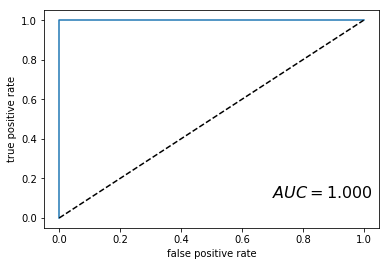

In [24]:
#calculate the false and true positive rate at various threholds
fpr, tpr, thresholds = metrics.roc_curve(y_true = ytest, y_score = predictions, pos_label = 1)
auroc = metrics.roc_auc_score(y_true = ytest, y_score = predictions)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')  #y=x line
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.text(0.7, 0.1, r'$AUC=%.3f$' %auroc, fontsize=16)
plt.show()

The preformance here is perfect, as it should be given that setosa is entirely linearly separable (even visually) from the other two flower types in the dimensions of petal length and width as seen is the above scatter plot)

# Allen Institute mouse brain in situ hybridization data

The Allen Institute generated a transcriptome-wide whole-brain in situ hybridization dataset published back in 2007. I will give a fuller describtion of the data during lecture. We will be using a subset of this data for the following section. A web interface for the data can be found here: https://mouse.brain-map.org/

I've taken a care of a lot of the pre-processing necessary for this data. The specific steps I took will be described in the lecture. In addition I've only given you half the number of total voxels (chosen randomly) and the top 100 genes that are highly expressed in the Thalamus, but not the rest of the brain. Pre-processing and filtering data is a large part of data analysis. However, I've chosen to give you filtered and subsetted data, because the orginal dataset is far too large to tractably compute on your individual computers. You have and will get some practice in filtering data with Ben.

### Read in data

First, download the two data files from my github repository under urpcourse19/data/lecture7/

In [25]:
#read in data
#remember, the infile path will change for you depending on where you've downloaded the data
infile1 = "/home/slu/urpcourse19/data/lecture7/ABAISHsubset.csv"
infile2 = "/home/slu/urpcourse19/data/lecture7/ABAISHsubset_labels.csv"
abasubset = pd.read_csv(infile1, index_col=0)
labels = pd.read_csv(infile2, index_col=0, header=None)

In [ ]:
#look at the shape and the beginning of the dataframe to make sure everything looks good


In [26]:
#split the data and ylabels into train and test folds
abatrain, abatest = splitdata(abasubset, 0.5)
ytrain, ytest = splitdata(labels, 0.5)

### linear regression

In [27]:
#fit the linear model
reg = LinearRegression().fit(abatrain, ytrain)

In [28]:
#how good is the fit based on the R^2 coefficient of determination
reg.score(abatrain, ytrain)

0.7661784099780311

Predict the held out test data using the linear regression model trained on the train fold of the data

In [29]:
#use the regression to predict the iris type
predictions = reg.predict(abatest)

Evaluate the performance of using linear regression as a classifier

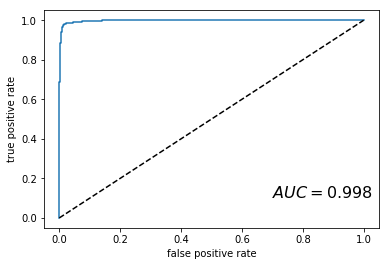

In [30]:
#calculate the false and true positive rate at various threholds
fpr, tpr, thresholds = metrics.roc_curve(y_true = ytest, y_score = predictions, pos_label = 1)
auroc = metrics.roc_auc_score(y_true=ytest, y_score=predictions)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')  #y=x line
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.text(0.7, 0.1, r'$AUC=%.3f$' %auroc, fontsize=16)
plt.show()

The performance here is very good too! This won't always be the case. I chose features (genes) that are highly differentially expressed and they do a very good job at discerning samples that belong to the thalamus vs. those that belong to the rest of the brain.